Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












### Replicate the Lesson Code

* **Categorical** variables contain a finite number of categories or distinct groups. Categorical data might not have a logical order. For example, categorical predictors include gender, material type, and payment method.  

* **Discrete** variables are numeric variables that have a countable number of values between any two values. A discrete variable is always numeric. For example, the number of customer complaints or the number of flaws or defects. 

* **Continuous** variables are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or date/time. For example, the length of a part or the date and time a payment is received.  

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# % is used to run non-python code: ie. terminal commands, debug, etc
# not required as I'm using colab


# %matplotlib inline


In [2]:
# specifying the plot style to use with pandas and matplot lib
# default = fast
# STYLES : https://matplotlib.org/3.2.2/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fast')

In [6]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

#### Part 1 - pandas built-in visualization tool

In [7]:
# read in data
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
ship = pd.read_csv(url)
# get info on DF
print(ship.shape)
ship.head()

(712, 6)


,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [9]:
# cabin is a categorical value
  # displayed using number or string values
# create new column
  # map Pclass into categorical values
ship['cabin_class'] = ship['Pclass'].map({
      1:'first', 
      2:'second',
      3:'third'})
ship.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


In [29]:
ship[ship['Pclass'] == 1]['Age']

1      38.0
3      35.0
5      54.0
10     58.0
20     28.0
       ... 
694    47.0
695    33.0
701    56.0
709    19.0
710    26.0
Name: Age, Length: 181, dtype: float64

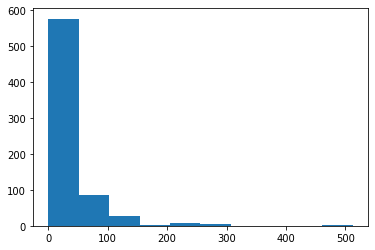

In [12]:
# fare is continuous, so lets display it with a histogram
ship.Fare.hist(grid=False);
#ship['Fare'].plot(kind='hist');

In [13]:
ship['Fare'].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

In [14]:
# max 512?! Remove extreme outliers
ship = ship[ship['Fare']<500].copy()
ship.shape

(709, 7)

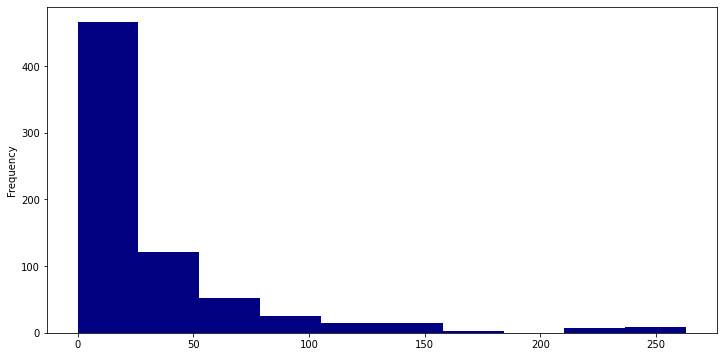

In [17]:
# ^ removed 3
# redraw histogram
ship['Fare'].plot(kind='hist', color='navy', figsize=(12,6));

In [18]:
# we can create categorical variables by using binning
# categorical variables = bins - 1 (usually?)
farebins = [0, 8, 15, 33, 500] # 5 bins, will create 4 categories
farelabels = ['low', 'med', 'high', 'very high']

In [22]:
#  apply binning with pandas cut
ship['fare_groups'] = pd.cut(ship['Fare'], bins=farebins, labels=farelabels)
# view based on index
myresults = ship['fare_groups'].value_counts().sort_index()
myresults

low          154
med          189
high         185
very high    174
Name: fare_groups, dtype: int64

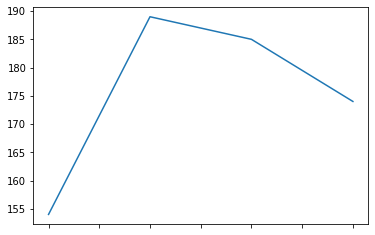

In [23]:
# plot results
myresults.plot();

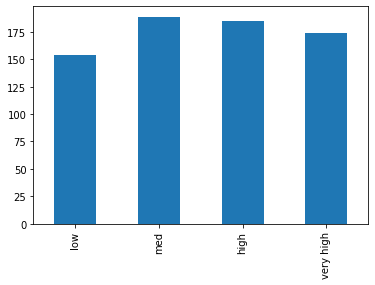

In [24]:
myresults.plot(kind='bar');

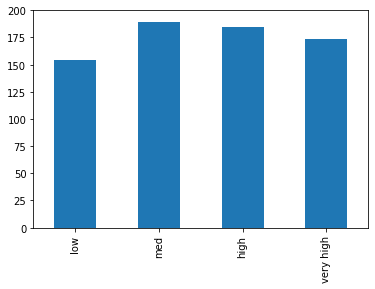

In [25]:
# data exceeds graph, increase the height
myresults.plot(ylim=(0,200), kind='bar');

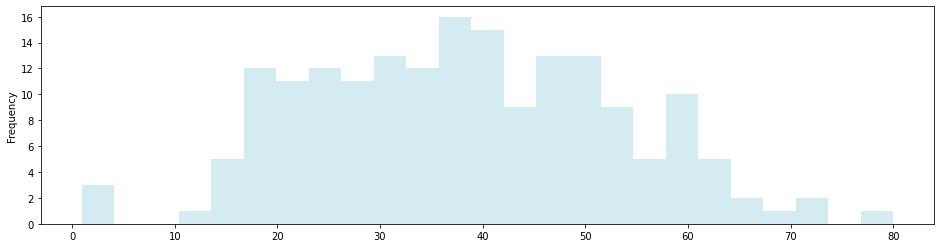

In [27]:
# stacked histogram
h_bins = 25
h_fig = (16,4)
h_alpha = 0.5
ship[ship['Pclass']==1]['Age'].plot(kind='hist', bins=h_bins, figsize=h_fig, color='lightblue', alpha=h_alpha);

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [ ]:
# More Work Here